In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Data Exploration

   - 상관분석 (Heatmap, PairPlot)
        * TSR vs STR 
        * Pass_Success vs Possesion
        * Ratiing 과 all features
        * Pts 포함(Target값 까지 포함시키고 시각화)
        
        
   - Data Visualization

In [2]:
# Load the Dataset
X = pd.read_csv('train.csv')

X.tail()

,Season,NAT,Club_Name,TSR,STR,PDO,Pass_Success,Possesion,Team_Value,AGE,FPPsq,Country Score,Rating,Pts
476,1516,GER,Wolfsburg,0.551852,0.560662,893.8322,0.820588,0.578824,7.58,24.5,0.542857,79.415,6.85,56.035
477,1516,GER,Eintracht Frankfurt,0.458194,0.439859,953.9767,0.721765,0.471765,2.50,23.9,0.571429,79.415,6.69,28.035
478,1516,GER,Borussia,0.493404,0.536775,949.0774,0.795152,0.556667,4.81,24.4,0.586207,79.415,6.94,42.035
479,1516,GER,Mainz 05,0.445851,0.466027,946.8986,0.720000,0.461471,1.73,24.3,0.564103,79.415,6.84,18.035
480,1516,GER,Augsburg,0.437485,0.446503,1082.3060,0.747647,0.468824,1.60,24.9,0.512821,79.415,6.80,23.035


## UEFA Club 대회에 참여한 클럽들의 참여 빈도 시각화

    * UEFA Club 대회에 참여한 횟수가 많은 클럽일수록 랭킹이 높은 팀이라는 것을 알 수 있다.

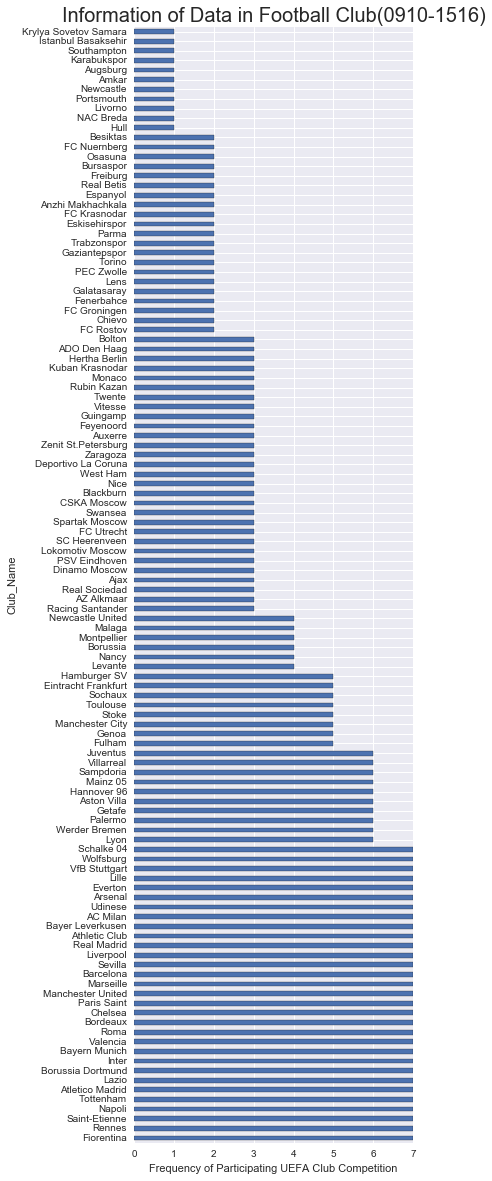

In [5]:
plt.figure(figsize = (5,20))
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
X['Club_Name'].value_counts().plot(kind = 'barh')
plt.xticks([i for i in range(0, 8)])
plt.xlabel('Frequency of Participating UEFA Club Competition')
plt.ylabel('Club_Name')
plt.title(('Information of Data in Football Club(0910-1516)'),{'fontsize' : 20})
plt.show()

# Heatmap을 이용한 변수간 상관관계 분석

* 색이 진할수록 변수 간 상관관계가 높은 것을 의미한다.
    * 즉, TSR과 STR, Pass_Success와 STR, Possesion과 STR 등 전체적으로 독립변수들 간(Pts 제외) 상관관계가 높은 것을 볼 수 있다.

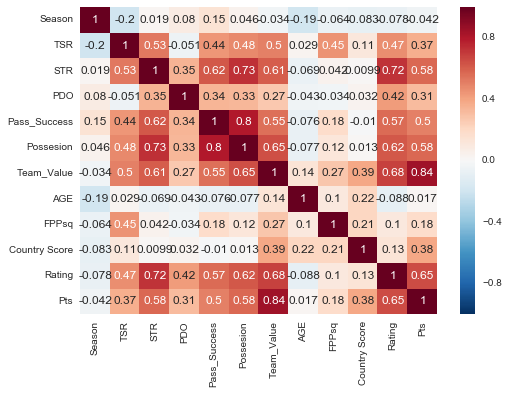

In [7]:
compare_feature = X.corr()
sns.heatmap(compare_feature, annot = True)

In [9]:
#변수로 쓰지 않을 column 제거
del X["Season"]
del X["NAT"]
del X["Club_Name"]
X.tail()

,TSR,STR,PDO,Pass_Success,Possesion,Team_Value,AGE,FPPsq,Country Score,Rating,Pts
476,0.551852,0.560662,893.8322,0.820588,0.578824,7.58,24.5,0.542857,79.415,6.85,56.035
477,0.458194,0.439859,953.9767,0.721765,0.471765,2.50,23.9,0.571429,79.415,6.69,28.035
478,0.493404,0.536775,949.0774,0.795152,0.556667,4.81,24.4,0.586207,79.415,6.94,42.035
479,0.445851,0.466027,946.8986,0.720000,0.461471,1.73,24.3,0.564103,79.415,6.84,18.035
480,0.437485,0.446503,1082.3060,0.747647,0.468824,1.60,24.9,0.512821,79.415,6.80,23.035


# Pairplot을 이용한 상관관계 분석

* Heatmap으로 표현한 것과 같이 전체적으로 Pts(Target 값)를 제외한 독립변수들 간 상관관계가 높은 것을 볼 수 있다.

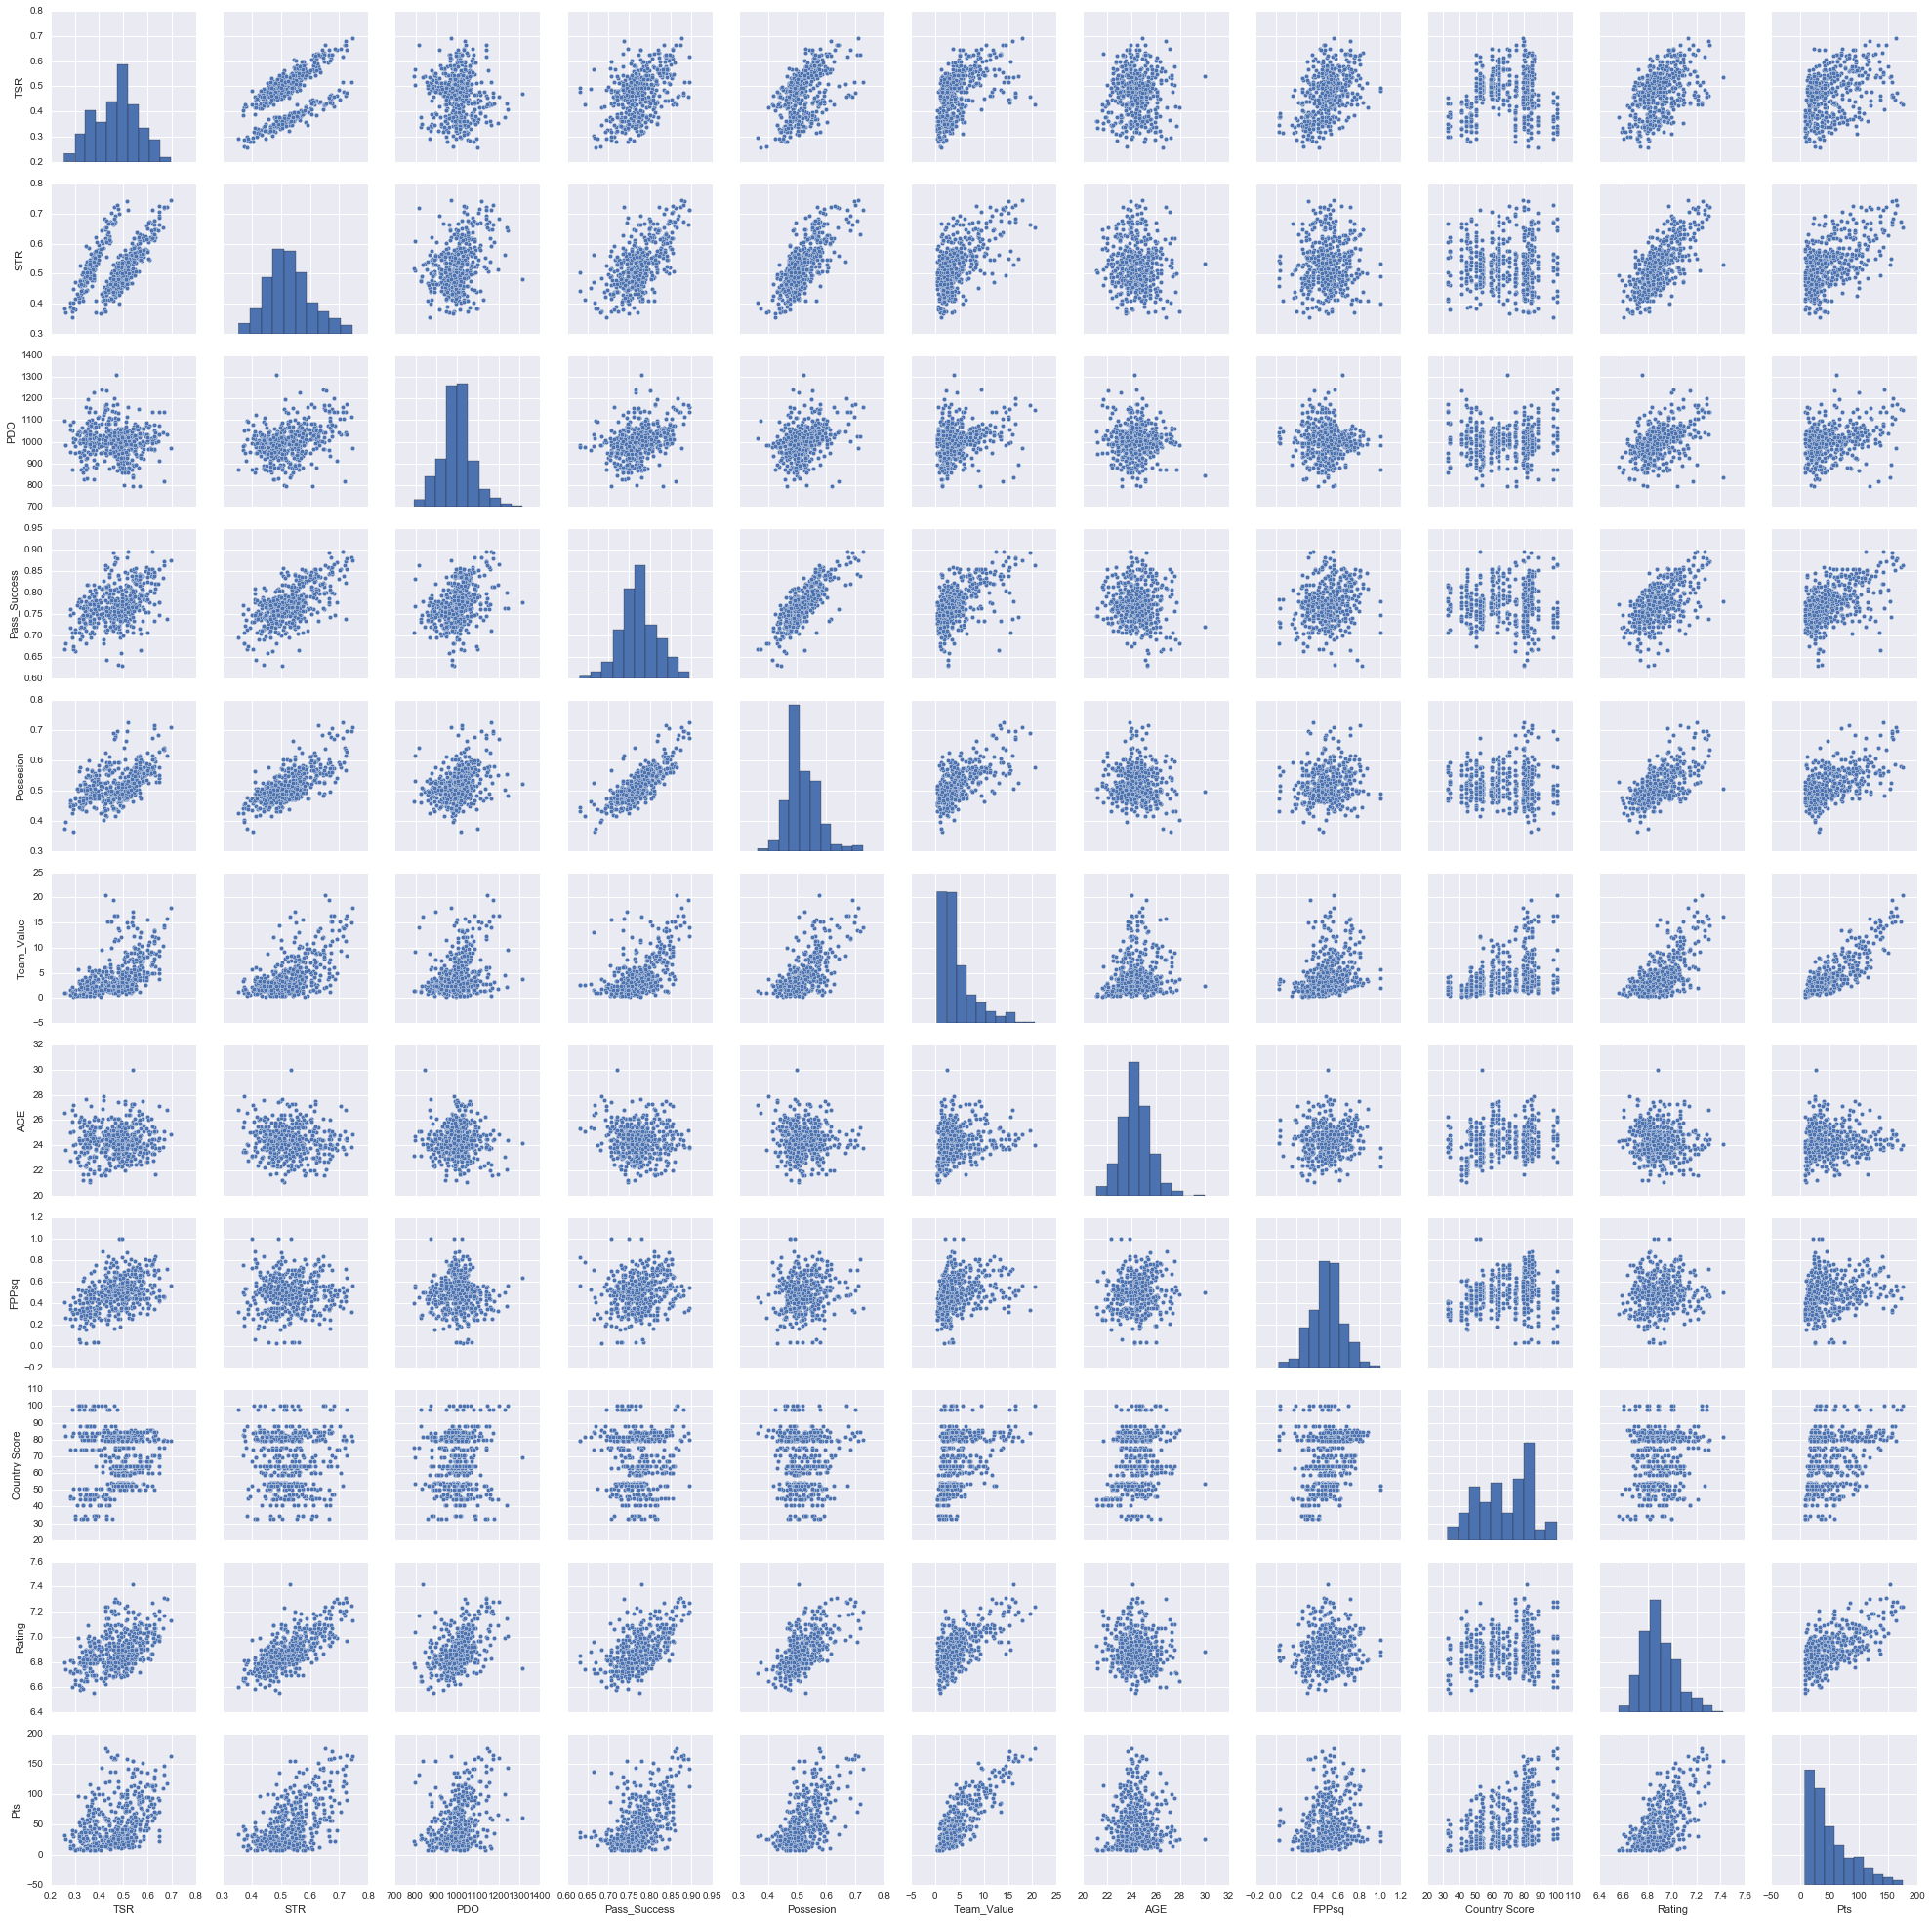

In [10]:
col = ["TSR", "STR", "PDO", "Pass_Success", "Possesion", "Team_Value", "AGE", "FPPsq", "Country Score", "Rating","Pts"]
dfX = X[[x for x in [0,1,2,3,4,5,6,7,8,9,10]]]

sns.pairplot(dfX[col])
